# Object Detection API Demo via Tensorflow2 object detection api

In [3]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  True
Tensorflow Version:  2.4.1
Keras Version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
!nvidia-smi

Sun May 16 17:58:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    38W / 300W |    429MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Object Detection API Installation

Ref: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2.md

In [5]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2648, done.
remote: Counting objects: 100% (2648/2648), done.
remote: Compressing objects: 100% (2192/2192), done.
remote: Total 2648 (delta 670), reused 1306 (delta 423), pack-reused 0
Receiving objects: 100% (2648/2648), 32.61 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (670/670), done.


In [ ]:
!protoc --version

libprotoc 3.0.0


In [ ]:
!pip list

Package                       Version       
----------------------------- --------------
absl-py                       0.12.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
astor                         0.8.1         
astropy                       4.2.1         
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.6         
atomicwrites                  1.4.0         
attrs                         20.3.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.0         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis                          0.4.1         
bokeh     

In [6]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1648944 sha256=fa51e8bad07661392bf490dec4271fc90855c6d12c5fe1cc57eadffc9d808a7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ie3667vr/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=0c0d05afd22ad7a40b36dd56fd047f72feb0f0b13d646aec6d0270b45a1a493e
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=07538beedf1c49bb7fa44b32ab5bbf6e30c873052cc66330c9de751e36fa540e
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78532 sha256=931aafbf492a8c37ddd20a9e4d0efcd837f7cce3e76a862e9495

ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.29.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [6]:
!python ./models/research/object_detection/builders/model_builder_tf2_test.py

2021-05-14 20:40:09.462055: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-05-14 20:40:11.854995: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-14 20:40:11.855948: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-14 20:40:11.860784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-14 20:40:11.861367: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySiz

In [5]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

# Inference
ref: https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/inference_tf2_colab.ipynb

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def get_keypoint_tuples(eval_config):
  """Return a tuple list of keypoint edges from the eval config.
  
  Args:
    eval_config: an eval config containing the keypoint edges
  
  Returns:
    a list of edge tuples, each in the format (start, end)
  """
  tuple_list = []
  kp_list = eval_config.keypoint_edge
  for edge in kp_list:
    tuple_list.append((edge.start, edge.end))
  return tuple_list

In [ ]:
# @title Choose the model to use, then evaluate the cell.
MODELS = {'centernet_with_keypoints': 'centernet_hg104_512x512_kpts_coco17_tpu-32', 'centernet_without_keypoints': 'centernet_hg104_512x512_coco17_tpu-8'}

model_display_name = 'centernet_without_keypoints' # @param ['centernet_with_keypoints', 'centernet_without_keypoints']
model_name = MODELS[model_display_name]

In [ ]:
# Download the checkpoint and put it into models/research/object_detection/test_data/

if model_display_name == 'centernet_with_keypoints':
  !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_kpts_coco17_tpu-32.tar.gz
  !tar -xf centernet_hg104_512x512_kpts_coco17_tpu-32.tar.gz
  !mv centernet_hg104_512x512_kpts_coco17_tpu-32/checkpoint models/research/object_detection/test_data/
else:
  !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_coco17_tpu-8.tar.gz
  !tar -xf centernet_hg104_512x512_coco17_tpu-8.tar.gz
  !mv centernet_hg104_512x512_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2021-05-11 00:10:20--  http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.126.128, 2a00:1450:4013:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426100886 (1.3G) [application/x-tar]
Saving to: ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’

centernet_hg104_512 100%[===================>]   1.33G   124MB/s    in 14s     

2021-05-11 00:10:35 (99.7 MB/s) - ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’ saved [1426100886/1426100886]



In [ ]:
model_name

'centernet_hg104_512x512_coco17_tpu-8'

In [ ]:
!ls models/research/object_detection/test_data/

checkpoint			 snapshot_serengeti_sequence_examples.record
context_rcnn_camera_trap.config  ssd_mobilenet_v1_fpp.config
pets_examples.record


In [ ]:
!pwd

/content


In [ ]:
!ls

centernet_hg104_512x512_coco17_tpu-8	     models
centernet_hg104_512x512_coco17_tpu-8.tar.gz  sample_data


In [ ]:
# pipeline_config = os.path.join('models/research/object_detection/configs/tf2/',
#                                 'center_net_hourglass104_512x512_coco17_tpu-8' + '.config')
pipeline_config = os.path.join('./centernet_hg104_512x512_coco17_tpu-8/' + 'pipeline.config')
model_dir = 'models/research/object_detection/test_data/checkpoint/'

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(model_dir, 'ckpt-0')).expect_partial()

def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [ ]:
pipeline_config

'./centernet_hg104_512x512_coco17_tpu-8/pipeline.config'

In [ ]:
label_map_path = configs['eval_input_config'].label_map_path
label_map_path

'PATH_TO_BE_CONFIGURED/label_map.txt'

In [ ]:
label_map_path='/content/models/research/object_detection/data/mscoco_label_map.pbtxt'

In [ ]:
label_map = label_map_util.load_labelmap(label_map_path)
label_map

item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}
item {
  name: "/m/0k4j"
  id: 3
  display_name: "car"
}
item {
  name: "/m/04_sv"
  id: 4
  display_name: "motorcycle"
}
item {
  name: "/m/05czz6l"
  id: 5
  display_name: "airplane"
}
item {
  name: "/m/01bjv"
  id: 6
  display_name: "bus"
}
item {
  name: "/m/07jdr"
  id: 7
  display_name: "train"
}
item {
  name: "/m/07r04"
  id: 8
  display_name: "truck"
}
item {
  name: "/m/019jd"
  id: 9
  display_name: "boat"
}
item {
  name: "/m/015qff"
  id: 10
  display_name: "traffic light"
}
item {
  name: "/m/01pns0"
  id: 11
  display_name: "fire hydrant"
}
item {
  name: "/m/02pv19"
  id: 13
  display_name: "stop sign"
}
item {
  name: "/m/015qbp"
  id: 14
  display_name: "parking meter"
}
item {
  name: "/m/0cvnqh"
  id: 15
  display_name: "bench"
}
item {
  name: "/m/015p6"
  id: 16
  display_name: "bird"
}
item {
  name: "/m/01yrx"
  id: 17
  display_name: "cat

In [ ]:
#label_map_path = configs['eval_input_config'].label_map_path
#label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
label_map_dict

{'airplane': 5,
 'apple': 53,
 'backpack': 27,
 'banana': 52,
 'baseball bat': 39,
 'baseball glove': 40,
 'bear': 23,
 'bed': 65,
 'bench': 15,
 'bicycle': 2,
 'bird': 16,
 'boat': 9,
 'book': 84,
 'bottle': 44,
 'bowl': 51,
 'broccoli': 56,
 'bus': 6,
 'cake': 61,
 'car': 3,
 'carrot': 57,
 'cat': 17,
 'cell phone': 77,
 'chair': 62,
 'clock': 85,
 'couch': 63,
 'cow': 21,
 'cup': 47,
 'dining table': 67,
 'dog': 18,
 'donut': 60,
 'elephant': 22,
 'fire hydrant': 11,
 'fork': 48,
 'frisbee': 34,
 'giraffe': 25,
 'hair drier': 89,
 'handbag': 31,
 'horse': 19,
 'hot dog': 58,
 'keyboard': 76,
 'kite': 38,
 'knife': 49,
 'laptop': 73,
 'microwave': 78,
 'motorcycle': 4,
 'mouse': 74,
 'orange': 55,
 'oven': 79,
 'parking meter': 14,
 'person': 1,
 'pizza': 59,
 'potted plant': 64,
 'refrigerator': 82,
 'remote': 75,
 'sandwich': 54,
 'scissors': 87,
 'sheep': 20,
 'sink': 81,
 'skateboard': 41,
 'skis': 35,
 'snowboard': 36,
 'spoon': 50,
 'sports ball': 37,
 'stop sign': 13,
 'suitca

Instructions for updating:
Use `tf.cast` instead.


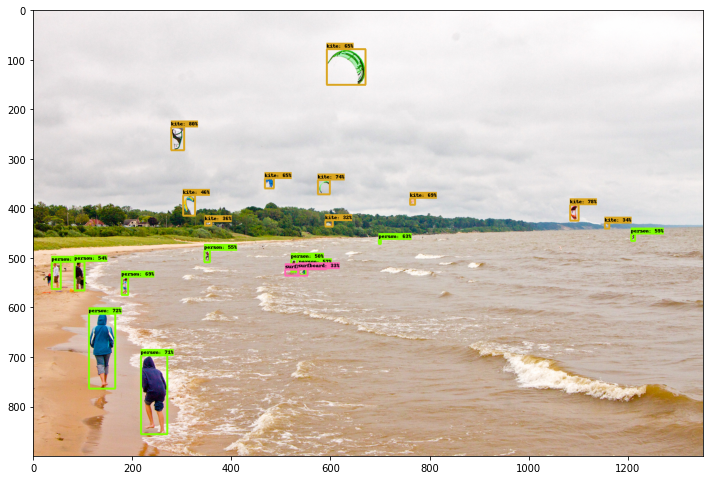

In [ ]:
image_dir = 'models/research/object_detection/test_images/'
image_path = os.path.join(image_dir, 'image2.jpg')
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in detections:
  keypoints = detections['detection_keypoints'][0].numpy()
  keypoint_scores = detections['detection_keypoint_scores'][0].numpy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=get_keypoint_tuples(configs['eval_config']))

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()

In [ ]:
detections['detection_boxes'][0] #get the first batch, only one batch

<tf.Tensor: shape=(100, 4), dtype=float32, numpy=
array([[0.26331702, 0.20630795, 0.3134004 , 0.2257505 ],
       [0.43730366, 0.80151385, 0.4719698 , 0.8148971 ],
       [0.38156968, 0.42489603, 0.41272268, 0.44364318],
       [0.681903  , 0.08294669, 0.84796304, 0.12350222],
       [0.77523005, 0.16085468, 0.95053935, 0.2007731 ],
       [0.5992846 , 0.13199385, 0.6379219 , 0.1426181 ],
       [0.42316636, 0.5627608 , 0.43578175, 0.5702687 ],
       [0.08820905, 0.437933  , 0.16722633, 0.49660912],
       [0.3785455 , 0.34565732, 0.39969328, 0.3596621 ],
       [0.5662745 , 0.02796838, 0.62555325, 0.04213667],
       [0.5147716 , 0.5157676 , 0.5233711 , 0.5195452 ],
       [0.50261086, 0.8926434 , 0.51683396, 0.89914817],
       [0.5714626 , 0.39679745, 0.5932119 , 0.40797928],
       [0.5398747 , 0.25573713, 0.5655136 , 0.26418972],
       [0.5638006 , 0.06161625, 0.6279921 , 0.07694124],
       [0.55976266, 0.38481852, 0.58640236, 0.394439  ],
       [0.41595435, 0.22352442, 0.4608

In [ ]:
detections['detection_classes'][0]

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([37, 37, 37,  0,  0,  0, 37, 37, 37,  0,  0,  0,  0,  0,  0,  0, 37,
       41, 37, 37, 41, 37, 37, 41,  0,  0, 37,  0, 30, 37,  0,  0,  0,  0,
       39, 37,  0, 30, 17, 41, 26,  0,  0, 41,  0,  0, 37, 37, 26, 36,  0,
       37,  0, 37,  0,  0, 30, 17,  0, 36, 41, 37,  0, 37,  0,  0, 37, 37,
        0, 27,  0,  0, 37, 37, 42, 37,  0, 41, 37, 33, 37,  2, 37,  0, 36,
        8,  0, 27,  0, 18,  0, 41, 37,  0,  0, 37, 37,  0, 37,  0],
      dtype=int32)>

In [ ]:
detections['detection_scores'][0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.7962751 , 0.78206927, 0.7410706 , 0.7218724 , 0.709158  ,
       0.6893627 , 0.6872321 , 0.6508865 , 0.64793307, 0.64436376,
       0.6263485 , 0.5901032 , 0.5733943 , 0.5519157 , 0.5434328 ,
       0.49587497, 0.4632389 , 0.42329958, 0.35777912, 0.34114274,
       0.328882  , 0.32425722, 0.2495297 , 0.24379438, 0.22302711,
       0.19288327, 0.18518162, 0.1585301 , 0.15249111, 0.1416736 ,
       0.14132652, 0.13689674, 0.13375592, 0.12325503, 0.11930387,
       0.11783273, 0.11717883, 0.11705264, 0.11549331, 0.11444061,
       0.11316915, 0.10898951, 0.1037046 , 0.09707274, 0.09699165,
       0.09487169, 0.08954646, 0.08784059, 0.08563183, 0.08429349,
       0.08406363, 0.08199514, 0.08186882, 0.08139408, 0.08128863,
       0.07760189, 0.07508621, 0.07300808, 0.07214538, 0.07115618,
       0.07113731, 0.06998829, 0.06737441, 0.06533942, 0.0637641 ,
       0.06343437, 0.06288642, 0.06269628, 0.06261943, 0.06232625,
       0.06188

# Custom Inference via checkpoint

In [ ]:
!wget https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg -O traffic.jpg

--2021-05-11 00:13:04--  https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191490 (187K) [image/jpeg]
Saving to: ‘traffic.jpg’

traffic.jpg         100%[===================>] 187.00K  --.-KB/s    in 0.03s   

2021-05-11 00:13:05 (6.91 MB/s) - ‘traffic.jpg’ saved [191490/191490]



In [ ]:
def show_inference(detection_model, image_path):
  #image_np = load_image_into_numpy_array(image_path)
  img_data = tf.io.gfile.GFile(image_path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  image_np = np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

  input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
  detect_fn = get_model_detection_function(detection_model)
  detections, predictions_dict, shapes = detect_fn(input_tensor)
  detectionboxes = detections['detection_boxes'][0].numpy()
  detectionscores = detections['detection_scores'][0].numpy()
  detectionclasses = detections['detection_classes'][0].numpy()
  
  label_id_offset = 1
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np,
      detectionboxes,
      (detectionclasses + label_id_offset).astype(int),
      detectionscores,
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False)

  plt.figure(figsize=(12,16))
  plt.imshow(image_np)
  plt.show()

In [ ]:
label_map_path='/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [ ]:
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
#https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

--2021-05-11 00:13:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.69.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211996178 (202M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet5 100%[===================>] 202.17M  44.0MB/s    in 4.6s    

2021-05-11 00:13:23 (44.0 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’ saved [211996178/211996178]



In [ ]:
!ls

centernet_hg104_512x512_coco17_tpu-8		     models
centernet_hg104_512x512_coco17_tpu-8.tar.gz	     sample_data
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz  traffic.jpg


In [ ]:
!tar -xf faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
#!tar -xf centernet_hg104_1024x1024_coco17_tpu-32.tar.gz
#!mv centernet_hg104_512x512_kpts_coco17_tpu-32/checkpoint models/research/object_detection/test_data/

In [ ]:
!ls

centernet_hg104_512x512_coco17_tpu-8		     models
centernet_hg104_512x512_coco17_tpu-8.tar.gz	     sample_data
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8	     traffic.jpg
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz


In [ ]:
def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

INFO:tensorflow:depth of additional conv before box predictor: 0
Instructions for updating:
Use ref() instead.


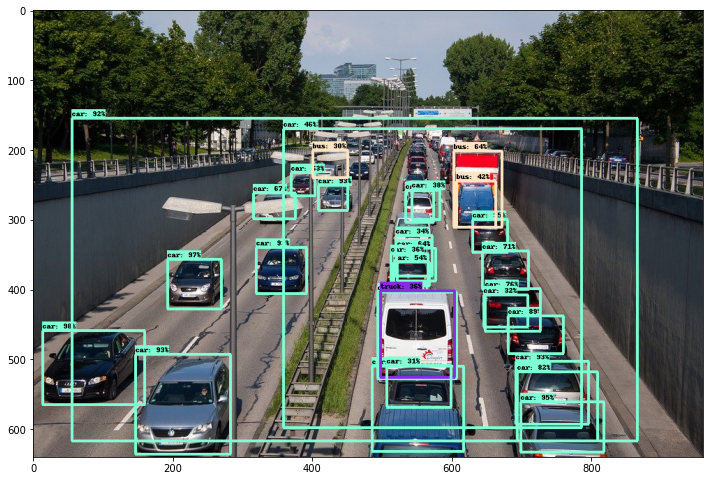

In [ ]:
# pipeline_config = './centernet_hg104_1024x1024_coco17_tpu-32/pipeline.config'
# model_dir = './centernet_hg104_1024x1024_coco17_tpu-32/checkpoint'
pipeline_config = './faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config'
model_dir = './faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint'

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(model_dir, 'ckpt-0')).expect_partial()

show_inference(detection_model, 'traffic.jpg')

# Custom Inference via Saved model

In [ ]:
!wget https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg -O traffic.jpg

--2021-05-10 17:04:47--  https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253264 (247K) [image/jpeg]
Saving to: ‘traffic.jpg’

traffic.jpg         100%[===================>] 247.33K  --.-KB/s    in 0.04s   

2021-05-10 17:04:47 (5.96 MB/s) - ‘traffic.jpg’ saved [253264/253264]



In [ ]:
label_map_path='/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [ ]:
label_map_dict

{'airplane': 5,
 'apple': 53,
 'backpack': 27,
 'banana': 52,
 'baseball bat': 39,
 'baseball glove': 40,
 'bear': 23,
 'bed': 65,
 'bench': 15,
 'bicycle': 2,
 'bird': 16,
 'boat': 9,
 'book': 84,
 'bottle': 44,
 'bowl': 51,
 'broccoli': 56,
 'bus': 6,
 'cake': 61,
 'car': 3,
 'carrot': 57,
 'cat': 17,
 'cell phone': 77,
 'chair': 62,
 'clock': 85,
 'couch': 63,
 'cow': 21,
 'cup': 47,
 'dining table': 67,
 'dog': 18,
 'donut': 60,
 'elephant': 22,
 'fire hydrant': 11,
 'fork': 48,
 'frisbee': 34,
 'giraffe': 25,
 'hair drier': 89,
 'handbag': 31,
 'horse': 19,
 'hot dog': 58,
 'keyboard': 76,
 'kite': 38,
 'knife': 49,
 'laptop': 73,
 'microwave': 78,
 'motorcycle': 4,
 'mouse': 74,
 'orange': 55,
 'oven': 79,
 'parking meter': 14,
 'person': 1,
 'pizza': 59,
 'potted plant': 64,
 'refrigerator': 82,
 'remote': 75,
 'sandwich': 54,
 'scissors': 87,
 'sheep': 20,
 'sink': 81,
 'skateboard': 41,
 'skis': 35,
 'snowboard': 36,
 'spoon': 50,
 'sports ball': 37,
 'stop sign': 13,
 'suitca

In [ ]:
label_map_dict[24]

KeyError: ignored

In [ ]:
#SSD MobileNet V2 FPNLite 640x640
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz 
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
#https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
#http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
#http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

--2021-05-11 00:34:31--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.69.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20518283 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.57M  21.3MB/s    in 0.9s    

2021-05-11 00:34:33 (21.3 MB/s) - ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’ saved [20518283/20518283]



In [ ]:
!tar -xf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

In [ ]:
!ls

centernet_hg104_512x512_coco17_tpu-8
centernet_hg104_512x512_coco17_tpu-8.tar.gz
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
models
sample_data
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
traffic.jpg


In [ ]:
!ls ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/

checkpoint  pipeline.config  saved_model


In [ ]:
import time
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('./ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 16.689645528793335s


In [ ]:
print(detect_fn.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_0:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_6:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_7:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_8:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_9:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_10:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_11:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_12:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_13:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_14:0' shape=<unknown> dtype=resource>, <

In [ ]:
detect_fn.signatures['serving_default'].output_shapes

{'detection_anchor_indices': TensorShape([1, 100]),
 'detection_boxes': TensorShape([1, 100, 4]),
 'detection_classes': TensorShape([1, 100]),
 'detection_multiclass_scores': TensorShape([1, 100, 91]),
 'detection_scores': TensorShape([1, 100]),
 'num_detections': TensorShape([1]),
 'raw_detection_boxes': TensorShape([1, 51150, 4]),
 'raw_detection_scores': TensorShape([1, 51150, 91])}

In [ ]:
detect_fn

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fd7ebe105d0>

19.145801067352295


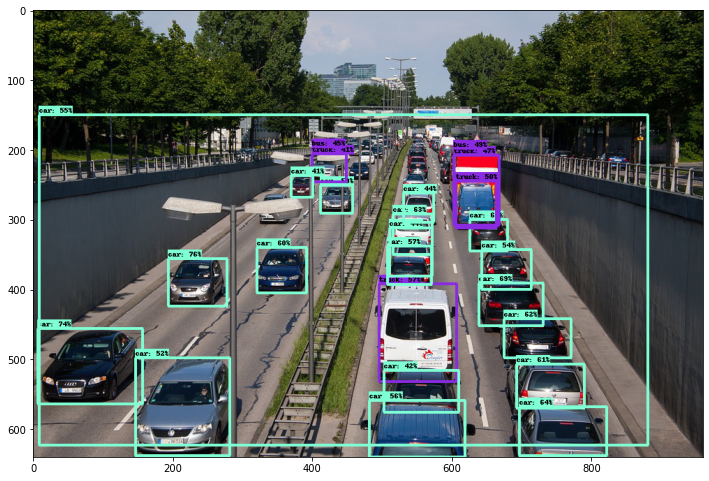

In [ ]:
image_path = os.path.join('traffic' + '.jpg')
#image_np = load_image_into_numpy_array(image_path)
img_data = tf.io.gfile.GFile(image_path, 'rb').read()
image = Image.open(BytesIO(img_data))
(im_width, im_height) = image.size
image_np = np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

input_tensor = np.expand_dims(image_np, 0)
start_time = time.time()
detections = detect_fn(input_tensor)
end_time = time.time()
print(end_time - start_time)

plt.rcParams['figure.figsize'] = [42, 21]
label_id_offset = 1
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.int32),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.40,
      agnostic_mode=False)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()
#plt.subplot(2, 1, i+1)
#plt.imshow(image_np_with_detections)

# Convert to *TFLite*
ref: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/running_on_mobile_tf2.md
https://github.com/tensorflow/models/blob/master/research/object_detection/export_tflite_graph_tf2.py


In [ ]:
!pwd

/content


In [ ]:
# From the tensorflow/models/research/ directory
#Step 1: Export TFLite inference graph
!cd models/research/ && python object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path /content/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config \
    --trained_checkpoint_dir /content/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint \
    --output_directory /content/exported_model \
    --max_detections 100

2021-05-10 17:11:25.144100: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-10 17:11:27.723775: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-10 17:11:27.724703: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-10 17:11:27.729662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-10 17:11:27.730335: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-10 17:11:27.730387: I tensorflow/stream_executor/platform/def

In [ ]:
!ls /content/exported_model/saved_model

assets	saved_model.pb	variables


https://www.tensorflow.org/lite/convert
https://www.tensorflow.org/api_docs/python/tf/lite/TFLiteConverter#from_saved_model

Step 2: Convert to TFLite

In [ ]:
!ls /content/exported_model/saved_model

assets	saved_model.pb	variables


In [ ]:
import tensorflow as tf

# Convert the model
saved_model_dir = './exported_model/saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('./model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!ls

exported_model	ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8
models		ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
model.tflite	traffic.jpg
sample_data


In [ ]:
!cp ./model.tflite /content/exported_model/

In [ ]:
!pwd

/content


In [ ]:
#Perform further optimization
saved_model_dir = './exported_model/saved_model'
converter2 = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter2.optimizations = [tf.lite.Optimize.DEFAULT] #Post-training quantization, the outputs are still stored using floating point
tflite_quant_model = converter2.convert()
open("./exported_model/model_quant1.tflite", "wb").write(tflite_quant_model)

4246960

In [ ]:
!ls /content/exported_model/

model_quant1.tflite  model.tflite  saved_model


In [ ]:
!zip exportedSSDfpnlite640.zip -r ./exported_model

  adding: exported_model/ (stored 0%)
  adding: exported_model/model_quant1.tflite (deflated 32%)
  adding: exported_model/model.tflite (deflated 12%)
  adding: exported_model/saved_model/ (stored 0%)
  adding: exported_model/saved_model/saved_model.pb (deflated 91%)
  adding: exported_model/saved_model/variables/ (stored 0%)
  adding: exported_model/saved_model/variables/variables.index (deflated 77%)
  adding: exported_model/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: exported_model/saved_model/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('exportedSSDfpnlite640.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can get further latency improvements, reductions in peak memory usage, and access to integer only hardware accelerators by making sure all model math is quantized. To do this, we need to measure the dynamic range of activations and inputs with a representative data set. You can simply create an input data generator and provide it to our converter.

In [ ]:
saved_model_dir = './exported_model/saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir,signature_keys=['serving_default'])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

with tf.io.gfile.GFile('model_nightly.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!ls 

exported_model		   sample_data
exportedSSDfpnlite640.zip  ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8
model_nightly.tflite	   ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
models			   traffic.jpg
model.tflite


https://www.tensorflow.org/lite/performance/post_training_quantization

In [ ]:
saved_model_dir = './exported_model/saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir,signature_keys=['serving_default'])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
#converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8,
                                       tf.lite.OpsSet.TFLITE_BUILTINS]
converter.representative_dataset = 
tflite_model = converter.convert()

with tf.io.gfile.GFile('model_nightly_int8.tflite', 'wb') as f:
  f.write(tflite_model)

ValueError: ignored

In [ ]:
# Load the TFLite model and allocate tensors.
interpreter_quant = tf.lite.Interpreter(model_path="model.tflite")
interpreter_quant.allocate_tensors()

# Get input and output tensors.
input_details = interpreter_quant.get_input_details()
print(input_details)

[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 640, 640,   3], dtype=int32), 'shape_signature': array([  1, 640, 640,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
output_details = interpreter_quant.get_output_details()
print(output_details)


[{'name': 'StatefulPartitionedCall:3', 'index': 333, 'shape': array([  1, 100,   4], dtype=int32), 'shape_signature': array([  1, 100,   4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 334, 'shape': array([  1, 100], dtype=int32), 'shape_signature': array([  1, 100], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:1', 'index': 335, 'shape': array([  1, 100], dtype=int32), 'shape_signature': array([  1, 100], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32

In [ ]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_shape

array([  1, 640, 640,   3], dtype=int32)

## TFLite Inference
https://www.tensorflow.org/lite/guide/python

In [ ]:
#install tflite
!pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
     |████████████████████████████████| 1.2MB 8.8MB/s 


In [ ]:
import tflite_runtime.interpreter as tflite

In [ ]:
def load_labels(filename):
    with open(filename, 'r') as f:
        return [line.strip() for line in f.readlines()]

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tflite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# Get input tensor details
input_details = interpreter.get_input_details()
print(input_details)
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 640, 640,   3], dtype=int32), 'shape_signature': array([  1, 640, 640,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:3', 'index': 333, 'shape': array([  1, 100,   4], dtype=int32), 'shape_signature': array([  1, 100,   4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 334, 'shape': array([  1, 100], dtype=int32), 'shape_signature': array([  1, 100], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array(

In [ ]:
# check the type of the input tensor
input_details[0]['dtype']
floating_model = input_details[0]['dtype'] == np.float32

In [ ]:
floating_model

True

In [ ]:
# NxHxWxC, H:1, W:2
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]
img = Image.open('traffic.jpg').resize((width, height))

In [ ]:
# add N dim
input_data = np.expand_dims(img, axis=0)

In [ ]:
if floating_model:
    input_data = (np.float32(input_data) - 127.5) / 127.5

In [ ]:
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
results = np.squeeze(output_data)
print(results)

[[[0.55625606 0.2012335  0.66166186 0.29006252]
  [0.7125526  0.00640202 0.8809878  0.16346318]
  [0.61222684 0.6647928  0.7047261  0.7605293 ]
  [0.88846916 0.7230151  0.9964104  0.85691565]
  [0.46995953 0.65071684 0.5388042  0.70868057]
  [0.691908   0.7035869  0.7774551  0.8028477 ]
  [0.79448897 0.7220326  0.88982946 0.8229286 ]
  [0.45724308 0.5357263  0.5457907  0.59688485]
  [0.5326053  0.33186543 0.63139284 0.4076202 ]
  [0.6157712  0.5156353  0.8276551  0.63235   ]
  [0.5377422  0.6687422  0.62468904 0.7435086 ]
  [0.5262874  0.5290954  0.61267155 0.59538996]
  [0.8757773  0.50182235 0.9985456  0.645098  ]
  [0.3924815  0.42791674 0.45374435 0.4788551 ]
  [0.778959   0.15159853 0.99644667 0.29445052]
  [0.24055082 0.01467973 0.9709478  0.9205902 ]
  [0.38309765 0.6299122  0.48788393 0.6926885 ]
  [0.32432777 0.6276896  0.4815784  0.6957257 ]
  [0.32220984 0.4159925  0.38327777 0.46908993]
  [0.48857492 0.5307586  0.59544474 0.5954895 ]
  [0.41105923 0.55308753 0.47506866 0.59

In [ ]:
results.shape

(100, 4)

In [ ]:
def get_output_tensor(interpreter, index):
    """Returns the output tensor at the given index."""
    output_details = interpreter.get_output_details()[index]
    tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
    return tensor

In [ ]:
# Get all output details
boxes = get_output_tensor(interpreter, 0)
classes = get_output_tensor(interpreter, 1)
scores = get_output_tensor(interpreter, 2)
count = int(get_output_tensor(interpreter, 3))

In [ ]:
boxes.shape

(100, 4)

In [ ]:
classes.shape

(100,)

In [ ]:
scores[0]

0.75977254

In [ ]:
count

100

In [ ]:
filteredresult = []
threshold=0.3
for i in range(count):
    if scores[i] >= threshold: # i>0 and 
        result = {
            'bounding_box': boxes[i],
            'class_id': classes[i],
            'score': scores[i]
        }
        filteredresult.append(result)

In [ ]:
len(filteredresult)

34

In [ ]:
label_map_path='/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
!cat $label_map_path

item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}
item {
  name: "/m/0k4j"
  id: 3
  display_name: "car"
}
item {
  name: "/m/04_sv"
  id: 4
  display_name: "motorcycle"
}
item {
  name: "/m/05czz6l"
  id: 5
  display_name: "airplane"
}
item {
  name: "/m/01bjv"
  id: 6
  display_name: "bus"
}
item {
  name: "/m/07jdr"
  id: 7
  display_name: "train"
}
item {
  name: "/m/07r04"
  id: 8
  display_name: "truck"
}
item {
  name: "/m/019jd"
  id: 9
  display_name: "boat"
}
item {
  name: "/m/015qff"
  id: 10
  display_name: "traffic light"
}
item {
  name: "/m/01pns0"
  id: 11
  display_name: "fire hydrant"
}
item {
  name: "/m/02pv19"
  id: 13
  display_name: "stop sign"
}
item {
  name: "/m/015qbp"
  id: 14
  display_name: "parking meter"
}
item {
  name: "/m/0cvnqh"
  id: 15
  display_name: "bench"
}
item {
  name: "/m/015p6"
  id: 16
  display_name: "bird"
}
item {
  name: "/m/01yrx"
  id: 17
  display_name: "cat

In [ ]:
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [ ]:
category_index[2]['name']

'bicycle'

In [ ]:
ori_im = cv2.imread('traffic.jpg')
imageshape=ori_im.shape
im_width=imageshape[1]#2720#800
im_height=imageshape[0]#1530#600
print("Image width: ", im_width)
print("Image height: ", im_height)

im = cv2.cvtColor(ori_im, cv2.COLOR_BGR2RGB)

Image width:  960
Image height:  640


In [ ]:
CAMERA_WIDTH=im_width
CAMERA_HEIGHT=im_height
def visualize_objects(img, results, labels):
    """Draws the bounding box and label for each object in the results."""
    for obj in results:
        # Convert the bounding box figures from relative coordinates
        # to absolute coordinates based on the original resolution
        ymin, xmin, ymax, xmax = obj['bounding_box']
        xmin = int(xmin * CAMERA_WIDTH)
        xmax = int(xmax * CAMERA_WIDTH)
        ymin = int(ymin * CAMERA_HEIGHT)
        ymax = int(ymax * CAMERA_HEIGHT)

        # Overlay the box, label, and score on the camera preview
        startpoint = (xmin, ymin)
        end_point = (xmax, ymax)
        cv2.rectangle(img, startpoint, end_point, color=(0, 255, 0), thickness=1) # Draw Rectangle with the coordinates
        #annotator.bounding_box([xmin, ymin, xmax, ymax])
        classes=labels[(obj['class_id']+1)]['name']
        print("class:", classes)
        textlabel = '%s  %.2f' % (classes, obj['score'])
        # print(obj)
        #print(int(obj['class_id']))
        # print(textlabel)
        text_size = 1
        cv2.putText(img, textlabel, startpoint,  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=1)
        #annotator.text([xmin, ymin], '%s\n%.2f' % (labels[obj['class_id']], obj['score']))
    return img

In [ ]:
import cv2
visimgtraffic=visualize_objects(im,filteredresult,category_index)

class: car
class: car
class: car
class: car
class: car
class: car
class: car
class: car
class: car
class: truck
class: car
class: car
class: car
class: car
class: car
class: car
class: truck
class: truck
class: bus
class: car
class: car
class: car
class: car
class: car
class: car
class: car
class: car
class: car
class: car
class: bus
class: car
class: car
class: car
class: car


In [ ]:
cv2.imwrite('resulttflite.jpg', visimgtraffic) 

True

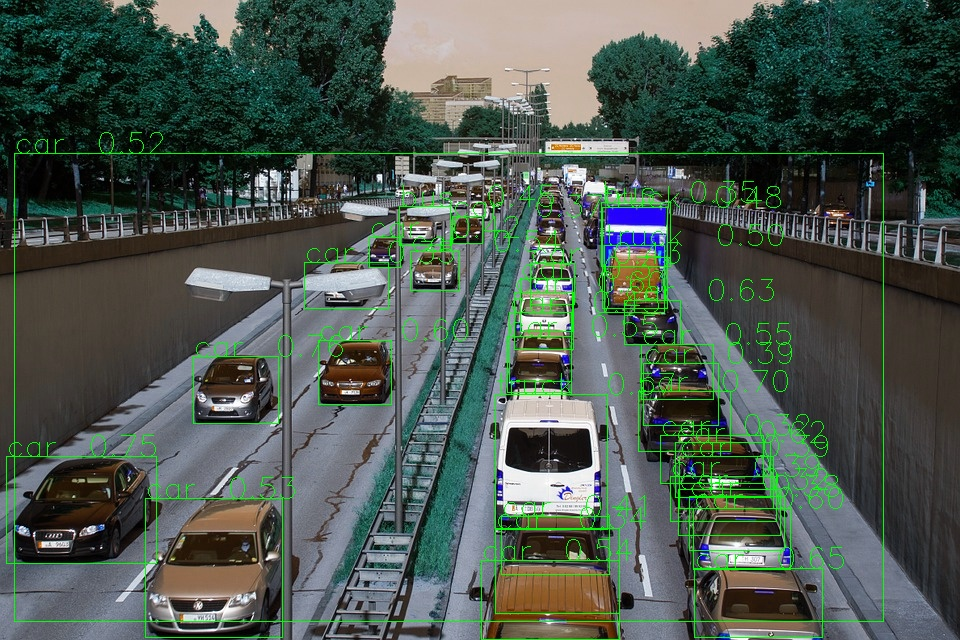

In [ ]:
from IPython.display import Image
Image(filename='resulttflite.jpg') 

# Custom Training

In [13]:
from google.colab import auth
auth.authenticate_user()

In [14]:
!gcloud config set project 'cmpelkk'

Updated property [core/project].


In [15]:
!gsutil ls gs://waymodataset #cocodata-bucket

gs://waymodataset/TFRecordTrain--00000-of-00005.tfrecord
gs://waymodataset/TFRecordTrain--00001-of-00005.tfrecord
gs://waymodataset/TFRecordTrain--00002-of-00005.tfrecord
gs://waymodataset/TFRecordTrain--00003-of-00005.tfrecord
gs://waymodataset/TFRecordTrain--00004-of-00005.tfrecord
gs://waymodataset/TFRecordVal--00000-of-00005.tfrecord
gs://waymodataset/TFRecordVal--00001-of-00005.tfrecord
gs://waymodataset/TFRecordVal--00002-of-00005.tfrecord
gs://waymodataset/TFRecordVal--00003-of-00005.tfrecord
gs://waymodataset/TFRecordVal--00004-of-00005.tfrecord
gs://waymodataset/waymo_labelmap.txt
gs://waymodataset/Validation0000/
gs://waymodataset/efficientdet_d2_coco17_tpu-32/
gs://waymodataset/efficientdet_d4_coco17_tpu-32/
gs://waymodataset/train100val20/
gs://waymodataset/train200val50/
gs://waymodataset/train20val5filtered/


In [9]:
!gsutil ls gs://waymodataset/train20val5filtered/

gs://waymodataset/train20val5filtered/TFRecordTrainBig--00000-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00001-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00002-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00003-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00004-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00000-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00001-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00002-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00003-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00004-of-00005.tfrecord
gs://waymodataset/train20val5filtered/waymo_labelmap.txt
gs://waymodataset/train20val5filtered/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/


## Check the TFRecord file

Ref: https://github.com/tensorflow/models/blob/6c63efed800ecd5f6168f17c706f35f07f27928b/official/nlp/transformer/data_pipeline.py#L193

In [10]:
!mkdir tfrecords
!gsutil cp gs://waymodataset/TFRecordVal--00000-of-00005.tfrecord ./tfrecords

Copying gs://waymodataset/TFRecordVal--00000-of-00005.tfrecord...
\ [1 files][152.8 MiB/152.8 MiB]                                                
Operation completed over 1 objects/152.8 MiB.                                    


In [11]:
!ls ./tfrecords

TFRecordVal--00000-of-00005.tfrecord


In [12]:
Local_Train_Path='./tfrecords/TFRecord*'
train_filenames = tf.io.gfile.glob(Local_Train_Path)

In [13]:
train_filenames

['./tfrecords/TFRecordVal--00000-of-00005.tfrecord']

from official.vision.detection.dataloader import input_reader: https://github.com/tensorflow/models/blob/master/official/vision/detection/main.py https://github.com/tensorflow/models/blob/master/official/vision/detection/dataloader/input_reader.py

In [15]:
#ref: https://github.com/tensorflow/models/blob/master/official/vision/detection/dataloader/tf_example_decoder.py
def _decode_image(parsed_tensors):
    """Decodes the image and set its static shape."""
    image = tf.io.decode_image(parsed_tensors['image/encoded'], channels=3)
    image.set_shape([None, None, 3])
    return image

def _decode_boxes(parsed_tensors):
    """Concat box coordinates in the format of [ymin, xmin, ymax, xmax]."""
    xmin = parsed_tensors['image/object/bbox/xmin']
    xmax = parsed_tensors['image/object/bbox/xmax']
    ymin = parsed_tensors['image/object/bbox/ymin']
    ymax = parsed_tensors['image/object/bbox/ymax']
    print(ymax)

    return tf.stack([ymin, xmin, ymax, xmax], axis=-1)

def _decode_areas(parsed_tensors):
    xmin = parsed_tensors['image/object/bbox/xmin']
    xmax = parsed_tensors['image/object/bbox/xmax']
    ymin = parsed_tensors['image/object/bbox/ymin']
    ymax = parsed_tensors['image/object/bbox/ymax']
    return tf.cond(
        tf.greater(tf.shape(parsed_tensors['image/object/area'])[0], 0),
        lambda: parsed_tensors['image/object/area'],
        lambda: (xmax - xmin) * (ymax - ymin))

#classlabelkeyname='image/object/class/label' #used in the previous TF record file
classlabelkeyname='image/object/class/text'#used in the new TF record file
# 'image/object/class/text':
#             tf.io.VarLenFeature(tf.int64),
def read_tfrecord(example):
    features = {
        'image/encoded':
            tf.io.FixedLenFeature((), tf.string),
        'image/source_id':
            tf.io.FixedLenFeature((), tf.string),
        'image/height':
            tf.io.FixedLenFeature((), tf.int64),
        'image/width':
            tf.io.FixedLenFeature((), tf.int64),
        'image/object/bbox/xmin':
            tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/xmax':
            tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymin':
            tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymax':
            tf.io.VarLenFeature(tf.float32),
        'image/object/class/label':
            tf.io.VarLenFeature(tf.int64),
        'image/object/class/text':
            tf.io.VarLenFeature(tf.string),
        'image/object/area':
            tf.io.VarLenFeature(tf.float32),
        'image/object/is_crowd':
            tf.io.VarLenFeature(tf.int64),
    }
    # features = {
    #     "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
    #     "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means scalar
    # }
    example = tf.io.parse_single_example(example, features)

    for k in example:
      if isinstance(example[k], tf.SparseTensor):
        if example[k].dtype == tf.string:
          example[k] = tf.sparse.to_dense(
              example[k], default_value='')
        else:
          example[k] = tf.sparse.to_dense(
              example[k], default_value=0)
          
    print("Got example")
    print(example['image/object/bbox/xmin'])
    image = _decode_image(example)
    print("Decoded image")
    boxes = _decode_boxes(example)
    print("Decoded boxes:", boxes)
    areas = _decode_areas(example)
    is_crowds = tf.cond(
        tf.greater(tf.shape(example['image/object/is_crowd'])[0], 0),
        lambda: tf.cast(example['image/object/is_crowd'], dtype=tf.bool),
        lambda: tf.zeros_like(example['image/object/class/label'], dtype=tf.bool))  # pylint: disable=line-too-long

    source_id = example['image/source_id']
    height=example['image/height']
    width=example['image/width']
    groundtruth_class=example['image/object/class/label']#['image/object/class/label']

    #image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.image.resize(image, IMAGE_SIZE)
    #image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size will be needed for TPU
    #class_label = example['class']
    print(groundtruth_class)
    decoded_tensors = {
        'image': image,
        'source_id': source_id,
        'height':height,
        'width':width,
        'groundtruth_classes': groundtruth_class,
        'groundtruth_is_crowd': is_crowds,
        'groundtruth_area': areas,
        'groundtruth_boxes': boxes,
    }
    return decoded_tensors#image, class_label

def load_dataset(filenames):
  # read from TFRecords. For optimal performance, read from multiple
  # TFRecord files at once and set the option experimental_deterministic = False
  # to allow order-altering optimizations.

  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False

  dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
  return dataset

In [16]:
AUTO = tf.data.experimental.AUTOTUNE
IMAGE_SIZE = [1280, 1920] #[640, 640] #[192, 192]
display_dataset=load_dataset(train_filenames)

Got example
Tensor("SparseToDense_2:0", shape=(None,), dtype=float32)
Decoded image
Tensor("SparseToDense_3:0", shape=(None,), dtype=float32)
Decoded boxes: Tensor("stack:0", shape=(None, 4), dtype=float32)
Tensor("SparseToDense_5:0", shape=(None,), dtype=int64)


In [17]:
decoded_tensors =next(iter(display_dataset))
decoded_tensors

{'groundtruth_area': <tf.Tensor: shape=(25,), dtype=float32, numpy=
 array([5.24277857e-05, 5.01555507e-04, 1.35695198e-04, 7.41678989e-04,
        7.62886339e-05, 4.97658795e-04, 9.33156480e-05, 6.64681313e-04,
        9.77141899e-05, 5.27716661e-03, 9.15461933e-05, 9.28437803e-05,
        5.21518523e-04, 2.56464991e-05, 2.37629446e-03, 4.13902380e-05,
        8.44039532e-05, 1.02096747e-04, 7.43727898e-04, 7.14185808e-05,
        9.93361100e-05, 2.54509825e-04, 4.05786486e-05, 1.10374815e-04,
        2.96062644e-04], dtype=float32)>,
 'groundtruth_boxes': <tf.Tensor: shape=(25, 4), dtype=float32, numpy=
 array([[4.71965492e-01, 5.41127883e-02, 4.81340647e-01, 5.97049929e-02],
        [5.03791690e-01, 4.28132504e-01, 5.18594623e-01, 4.62014675e-01],
        [4.95650113e-01, 3.00334215e-01, 5.05025268e-01, 3.14808130e-01],
        [5.24762452e-01, 9.74523604e-01, 5.53874850e-01, 1.00000000e+00],
        [5.38825214e-01, 8.82745683e-01, 5.43759525e-01, 8.98206532e-01],
        [5.176077

In [18]:
decoded_tensors['groundtruth_boxes'].numpy()

array([[4.71965492e-01, 5.41127883e-02, 4.81340647e-01, 5.97049929e-02],
       [5.03791690e-01, 4.28132504e-01, 5.18594623e-01, 4.62014675e-01],
       [4.95650113e-01, 3.00334215e-01, 5.05025268e-01, 3.14808130e-01],
       [5.24762452e-01, 9.74523604e-01, 5.53874850e-01, 1.00000000e+00],
       [5.38825214e-01, 8.82745683e-01, 5.43759525e-01, 8.98206532e-01],
       [5.17607749e-01, 6.40636206e-01, 5.38331807e-01, 6.64649785e-01],
       [5.12672603e-01, 5.47711432e-01, 5.25007069e-01, 5.55276871e-01],
       [5.29696763e-01, 1.64476558e-04, 5.81506908e-01, 1.29936486e-02],
       [5.10452986e-01, 5.27640820e-01, 5.31670511e-01, 5.32246172e-01],
       [3.94100934e-01, 1.50597081e-01, 5.20418942e-01, 1.92373917e-01],
       [5.24515748e-01, 7.21558690e-01, 5.30436933e-01, 7.37019479e-01],
       [5.15880764e-01, 5.21390676e-01, 5.22295296e-01, 5.35864651e-01],
       [4.88742113e-01, 1.59048840e-01, 5.13907015e-01, 1.79772884e-01],
       [5.16226590e-01, 5.44912994e-01, 5.21160901e

In [19]:
decoded_tensors['groundtruth_classes'].numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1])

In [21]:
decoded_tensors['width'].numpy()

1920

In [22]:
testimage=decoded_tensors['image']
testlabel=decoded_tensors['groundtruth_classes'].numpy()
testboundingbox=decoded_tensors['groundtruth_boxes'].numpy()
testlabel.size

25

In [23]:
testlabel

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1])

In [24]:
testboundingbox.shape

(25, 4)

In [53]:
[xmin, ymin, xmax, ymax]=testboundingbox[0]

In [25]:
import pandas as pd
import os, sys, math
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

##Unknown:0, Vehicles: 1, Pedestrians: 2, Cyclists: 3, Signs (removed)
INSTANCE_CATEGORY_NAMES = [
    'Unknown', 'Vehicles', 'Pedestrians', 'Cyclists'
]
INSTANCE_Color = {
    'Unknown':'black', 'Vehicles':'red', 'Pedestrians':'green', 'Cyclists':'purple'
}#'Unknown', 'Vehicles', 'Pedestrians', 'Cyclists'
# WAYMO_CLASSES =['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']
# INSTANCE_Color = {
#     'Unknown':'black', b'vehicle':'red', b'pedestrian':'green', b'sign':'red', b'cyclist':'purple'
# }#'Unknown', 'Vehicles', 'Pedestrians', 'Cyclists'


def show_oneimage_category(image, label, boundingbox):
  fig = plt.figure(figsize=(30,30))
  ax = fig.add_subplot(1, 1, 1)

  len=label.size
  print(len)
  img_height=IMAGE_SIZE[0]
  img_width=IMAGE_SIZE[1]
  for index in range(len):
    box= boundingbox[index]
    labelid=label[index]
    labelname=INSTANCE_CATEGORY_NAMES[labelid] #labelid #INSTANCE_CATEGORY_NAMES[labelid]
    classcolor=INSTANCE_Color[labelname]
    #[xmin, ymin, xmax, ymax]=box#*IMAGE_SIZE[0]
    [ymin, xmin, ymax, xmax]=box
    xmin=xmin*img_width
    xmax=xmax*img_width
    ymin=ymin*img_height
    ymax=ymax*img_height
    boxwidth=xmax-xmin
    boxheight=ymax-ymin
    if (boxwidth/img_width>0.01 and boxheight/img_height>0.01):
      print("Class id:", labelid)
      print(box)
      # Draw the object bounding box. https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
      ax.add_patch(patches.Rectangle(
          xy=(xmin,
              ymin),
          width=boxwidth,
          height=boxheight,
          linewidth=1,
          edgecolor=classcolor, #'red',
          facecolor='none'))
      # ax.add_patch(patches.Rectangle(
      #     xy=(ymin,
      #         xmin),
      #     width=ymax-ymin,
      #     height=xmax-xmin,
      #     linewidth=1,
      #     edgecolor=classcolor, #'red',
      #     facecolor='none'))
      #ax.text(ymin, xmin, labelname, color=classcolor, fontsize=10)
      ax.text(xmin, ymin, labelname, color=classcolor, fontsize=10)
            
  
  plt.imshow(image)
  #plt.title(CLASSES[label_batch.numpy()])

testimage=decoded_tensors['image']
testlabel=decoded_tensors['groundtruth_classes'].numpy()
testboundingbox=decoded_tensors['groundtruth_boxes'].numpy()
show_oneimage_category(testimage, testlabel, testboundingbox)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
display_dataset_iter=iter(display_dataset)

In [27]:
decoded_tensors =next(display_dataset_iter)
testimage=decoded_tensors['image']
testlabel=decoded_tensors['groundtruth_classes'].numpy()
testboundingbox=decoded_tensors['groundtruth_boxes'].numpy()
show_oneimage_category(testimage, testlabel, testboundingbox)

Output hidden; open in https://colab.research.google.com to view.

In [28]:
decoded_tensors =next(display_dataset_iter)
testimage=decoded_tensors['image']
testlabel=decoded_tensors['groundtruth_classes'].numpy()
testboundingbox=decoded_tensors['groundtruth_boxes'].numpy()
show_oneimage_category(testimage, testlabel, testboundingbox)

Output hidden; open in https://colab.research.google.com to view.

## Start Training

Configure the pipeline.config:


1.   change num_classes
2.   change batch_size
3.   label_map_path
4.   train input tfrecord
5.   val input tfrecord



In [29]:
!mkdir myoutputmodel

In [30]:
!gsutil cp gs://waymodataset/waymo_labelmap.txt .

Copying gs://waymodataset/waymo_labelmap.txt...
- [1 files][  114.0 B/  114.0 B]                                                
Operation completed over 1 objects/114.0 B.                                      


In [62]:
!gsutil cp waymo_labelmap.txt gs://waymodataset/train20val5filtered/

Copying file://waymo_labelmap.txt [Content-Type=text/plain]...
/ [1 files][  144.0 B/  144.0 B]                                                
Operation completed over 1 objects/144.0 B.                                      


In [63]:
!gsutil ls gs://waymodataset/train20val5filtered/

gs://waymodataset/train20val5filtered/TFRecordTrainBig--00000-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00001-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00002-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00003-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordTrainBig--00004-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00000-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00001-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00002-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00003-of-00005.tfrecord
gs://waymodataset/train20val5filtered/TFRecordValBig--00004-of-00005.tfrecord
gs://waymodataset/train20val5filtered/waymo_labelmap.txt


In [ ]:
!ls

adc.json
centernet_hg104_512x512_coco17_tpu-8
centernet_hg104_512x512_coco17_tpu-8.tar.gz
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
models
myoutputmodel
sample_data
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
tfrecords
traffic.jpg
waymo_labelmap.txt


In [31]:
!cat waymo_labelmap.txt


item {
  id: 1
  name: 'Vehicles'
}

item {
  id: 2
  name: 'Pedestrians'
}

item {
  id: 3
  name: 'Cyclists'
}


In [32]:
#Download model from https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz 

--2021-05-15 17:23:08--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.203.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244755628 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.42M  46.3MB/s    in 5.0s    

2021-05-15 17:23:14 (46.3 MB/s) - ‘ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’ saved [244755628/244755628]



In [33]:
!tar -xf ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz

In [34]:
num_steps = 30000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps


model_name = "ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8"#MODELS_CONFIG[chosen_model]['model_name']
batch_size = 8

In [35]:
pipeline_fname = './'+ model_name + '/pipeline.config' # + base_pipeline_file
fine_tune_checkpoint = './' + model_name + '/checkpoint/ckpt-0'
label_map_pbtxt_fname = './waymo_labelmap.txt'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
num_classes

3

In [36]:
train_record_fname = "gs://waymodataset/TFRecordTrain*"#"./tfrecords/TFRecords-Train*"
test_record_fname = "gs://waymodataset/TFRecordVal*"#./tfrecords/TFRecords-Val*"

In [37]:
#write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file

import re
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)



writing custom configuration file


Change the PATH_TO_BE_CONFIGURED in the pipeline_file.config for the tfrecord path

In [38]:
!cat pipeline_file.config

model {
  ssd {
    num_classes: 3
    image_resizer {
      fixed_shape_resizer {
        height: 1024
        width: 1024
      }
    }
    feature_extractor {
      type: "ssd_resnet50_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      

In [39]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

GPU Available:  True
Tensorflow Version:  2.4.1
Keras Version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [40]:
!nvidia-smi

Sat May 15 17:25:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    40W / 300W |    429MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [41]:
#Training
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

2021-05-15 17:25:36.049065: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-15 17:25:38.501629: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-15 17:25:38.502477: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-15 17:25:38.512736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-15 17:25:38.513383: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-15 17:25:38.513437: I tensorflow/stream_executor/platform/defau

In [42]:
#evaluation
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
CHECKPOINT_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2021-05-15 23:17:42.596442: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0515 23:17:49.748803 140642742613888 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0515 23:17:49.749084 140642742613888 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0515 23:17:49.749192 140642742613888 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0515 23:17:49.749307 140642742613888 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0515 23:17:49.749467 140642742613888 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-15 23:17:49.758212: I tensorflow/compiler/jit/xla

In [43]:
!cat pipeline_file.config

model {
  ssd {
    num_classes: 3
    image_resizer {
      fixed_shape_resizer {
        height: 1024
        width: 1024
      }
    }
    feature_extractor {
      type: "ssd_resnet50_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      

In [44]:
#Training
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

2021-05-15 23:33:13.835224: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-15 23:33:16.289651: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-15 23:33:16.290610: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-15 23:33:16.298769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-15 23:33:16.299387: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-15 23:33:16.299424: I tensorflow/stream_executor/platform/defau

In [45]:
#evaluation
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
CHECKPOINT_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2021-05-16 03:35:37.519524: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0516 03:35:40.669750 139910028982144 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0516 03:35:40.670002 139910028982144 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0516 03:35:40.670109 139910028982144 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0516 03:35:40.670223 139910028982144 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0516 03:35:40.670367 139910028982144 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-16 03:35:40.678426: I tensorflow/compiler/jit/xla

In [46]:
#export inference model
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir ./myoutputmodel --output_directory ./Newexported-models1


2021-05-16 03:59:20.674728: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 03:59:22.900957: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 03:59:22.901879: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 03:59:22.909447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 03:59:22.910072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-16 03:59:22.910114: I tensorflow/stream_executor/platform/defau

In [47]:
!zip Newexported-models_ssd1024.zip -r ./Newexported-models1
from google.colab import files
files.download('Newexported-models_ssd1024.zip')

  adding: Newexported-models1/ (stored 0%)
  adding: Newexported-models1/checkpoint/ (stored 0%)
  adding: Newexported-models1/checkpoint/checkpoint (deflated 41%)
  adding: Newexported-models1/checkpoint/ckpt-0.index (deflated 82%)
  adding: Newexported-models1/checkpoint/ckpt-0.data-00000-of-00001 (deflated 6%)
  adding: Newexported-models1/saved_model/ (stored 0%)
  adding: Newexported-models1/saved_model/variables/ (stored 0%)
  adding: Newexported-models1/saved_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: Newexported-models1/saved_model/variables/variables.index (deflated 79%)
  adding: Newexported-models1/saved_model/saved_model.pb (deflated 94%)
  adding: Newexported-models1/saved_model/assets/ (stored 0%)
  adding: Newexported-models1/pipeline.config (deflated 67%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Using new data train100val20/TFRecordTrainBig--00004-of-00010.tfrecord 

In [2]:
!gsutil ls gs://waymodataset/train100val20

gs://waymodataset/train100val20/
gs://waymodataset/train100val20/TFRecordTrainBig--00000-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00001-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00002-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00003-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00004-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00005-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00006-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00007-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00008-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00009-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordValBig--00000-of-00005.tfrecord
gs://waymodataset/train100val20/TFRecordValBig--00001-of-00005.tfrecord
gs://waymodataset/train100val20/TFRecordValBig--00002-of-00005.tfrecord
gs://waymod

In [56]:
!gsutil cp gs://waymodataset/train100val20/waymo_labelmap.txt .

Copying gs://waymodataset/train100val20/waymo_labelmap.txt...
/ [1 files][  145.0 B/  145.0 B]                                                
Operation completed over 1 objects/145.0 B.                                      


In [57]:
!cat waymo_labelmap.txt


item {
  id: 1
  name: 'vehicle'
}

item {
  id: 2
  name: 'pedestrian'
}

item {
  id: 3
  name: 'sign'
}

item {
  id: 4
  name: 'cyclist'
}



In [58]:
!cat pipeline_file.config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 1024
        width: 1024
      }
    }
    feature_extractor {
      type: "ssd_resnet50_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      

In [1]:
!nvidia-smi

Sun May 16 17:56:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Training
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel2'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

2021-05-16 04:32:00.923551: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 04:32:03.447334: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 04:32:03.448339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 04:32:03.456577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 04:32:03.457175: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-16 04:32:03.457210: I tensorflow/stream_executor/platform/defau

In [16]:
!gsutil ls gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8

gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline.config
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/modeloutput/
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/


In [17]:
PIPELINE_CONFIG_PATH='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config'
MODEL_DIR='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/modeloutput'
CHECKPOINT_DIR=MODEL_DIR#'./myoutputmodel2'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2021-05-16 18:09:08.316972: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0516 18:09:12.585208 140671331837824 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0516 18:09:12.585468 140671331837824 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0516 18:09:12.585555 140671331837824 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0516 18:09:12.585638 140671331837824 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0516 18:09:12.585774 140671331837824 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-16 18:09:12.593039: I tensorflow/compiler/jit/xla

In [18]:
#export inference model
PIPELINE_CONFIG_PATH='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config'
MODEL_DIR='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/modeloutput'
CHECKPOINT_DIR=MODEL_DIR#'./myoutputmodel2'
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir {CHECKPOINT_DIR} --output_directory ./Newexported-models2


2021-05-16 21:00:30.556094: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 21:00:34.200672: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 21:00:34.201592: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 21:00:34.209045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 21:00:34.209639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-16 21:00:34.209675: I tensorflow/stream_executor/platform/defau

In [19]:
!ls ./Newexported-models2

checkpoint  pipeline.config  saved_model


In [20]:
!zip Newexported-models_ssd1024_ckpt61.zip -r ./Newexported-models2

  adding: Newexported-models2/ (stored 0%)
  adding: Newexported-models2/checkpoint/ (stored 0%)
  adding: Newexported-models2/checkpoint/checkpoint (deflated 42%)
  adding: Newexported-models2/checkpoint/ckpt-0.index (deflated 82%)
  adding: Newexported-models2/checkpoint/ckpt-0.data-00000-of-00001 (deflated 7%)
  adding: Newexported-models2/saved_model/ (stored 0%)
  adding: Newexported-models2/saved_model/variables/ (stored 0%)
  adding: Newexported-models2/saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: Newexported-models2/saved_model/variables/variables.index (deflated 79%)
  adding: Newexported-models2/saved_model/saved_model.pb (deflated 94%)
  adding: Newexported-models2/saved_model/assets/ (stored 0%)
  adding: Newexported-models2/pipeline.config (deflated 68%)


In [21]:
!gsutil ls gs://waymodataset/train100val20

gs://waymodataset/train100val20/
gs://waymodataset/train100val20/TFRecordTrainBig--00000-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00001-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00002-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00003-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00004-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00005-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00006-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00007-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00008-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordTrainBig--00009-of-00010.tfrecord
gs://waymodataset/train100val20/TFRecordValBig--00000-of-00005.tfrecord
gs://waymodataset/train100val20/TFRecordValBig--00001-of-00005.tfrecord
gs://waymodataset/train100val20/TFRecordValBig--00002-of-00005.tfrecord
gs://waymod

In [22]:
!gsutil cp gs://waymodataset/train100val20/waymo_labelmap.txt .

Copying gs://waymodataset/train100val20/waymo_labelmap.txt...
/ [1 files][  145.0 B/  145.0 B]                                                
Operation completed over 1 objects/145.0 B.                                      


In [23]:
!gsutil ls gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/

gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline.config
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/modeloutput/
gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/saved_model/


In [24]:
!gsutil cp gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config .

Copying gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config...
/ [1 files][  4.5 KiB/  4.5 KiB]                                                
Operation completed over 1 objects/4.5 KiB.                                      


In [26]:
!cat pipeline_file.config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 1024
        width: 1024
      }
    }
    feature_extractor {
      type: "ssd_resnet50_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      

In [27]:
#Training
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

2021-05-16 21:15:38.745241: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 21:15:41.015274: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 21:15:41.016190: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 21:15:41.024119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 21:15:41.024749: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-16 21:15:41.024790: I tensorflow/stream_executor/platform/defau

In [28]:
#evaluation
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
CHECKPOINT_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2021-05-17 03:12:37.545048: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0517 03:12:44.502218 140498556610432 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0517 03:12:44.502440 140498556610432 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0517 03:12:44.502534 140498556610432 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0517 03:12:44.502621 140498556610432 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0517 03:12:44.502762 140498556610432 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-17 03:12:44.510234: I tensorflow/compiler/jit/xla

In [29]:
PIPELINE_CONFIG_PATH='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config'
MODEL_DIR='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/modeloutput'
CHECKPOINT_DIR=MODEL_DIR#'./myoutputmodel2'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2021-05-17 03:34:46.663032: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0517 03:34:50.570943 140311551760256 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0517 03:34:50.571228 140311551760256 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0517 03:34:50.571315 140311551760256 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0517 03:34:50.571400 140311551760256 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0517 03:34:50.571525 140311551760256 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-17 03:34:50.579308: I tensorflow/compiler/jit/xla

In [30]:
#export inference model
PIPELINE_CONFIG_PATH='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/pipeline_file.config'
MODEL_DIR='gs://waymodataset/train100val20/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8/modeloutput'
CHECKPOINT_DIR=MODEL_DIR#'./myoutputmodel2'
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir {CHECKPOINT_DIR} --output_directory ./Newexported-models3


2021-05-17 04:12:12.926908: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-17 04:12:16.837545: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-17 04:12:16.838474: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-17 04:12:16.846735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-17 04:12:16.847338: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-17 04:12:16.847406: I tensorflow/stream_executor/platform/defau

In [31]:
!zip Newexported-models_ssd1024ckpt101.zip -r ./Newexported-models3

  adding: Newexported-models3/ (stored 0%)
  adding: Newexported-models3/checkpoint/ (stored 0%)
  adding: Newexported-models3/checkpoint/checkpoint (deflated 41%)
  adding: Newexported-models3/checkpoint/ckpt-0.index (deflated 81%)
  adding: Newexported-models3/checkpoint/ckpt-0.data-00000-of-00001 (deflated 7%)
  adding: Newexported-models3/saved_model/ (stored 0%)
  adding: Newexported-models3/saved_model/variables/ (stored 0%)
  adding: Newexported-models3/saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: Newexported-models3/saved_model/variables/variables.index (deflated 80%)
  adding: Newexported-models3/saved_model/saved_model.pb (deflated 94%)
  adding: Newexported-models3/saved_model/assets/ (stored 0%)
  adding: Newexported-models3/pipeline.config (deflated 68%)


In [32]:
#Training to 50000 steps
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

2021-05-17 04:35:28.830770: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-17 04:35:31.249188: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-17 04:35:31.250132: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-17 04:35:31.258195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-17 04:35:31.258784: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-17 04:35:31.258817: I tensorflow/stream_executor/platform/defau

In [37]:
!cat ./pipeline_file.config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 1024
        width: 1024
      }
    }
    feature_extractor {
      type: "ssd_resnet50_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      

In [34]:
#evaluation
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
CHECKPOINT_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2021-05-17 07:58:53.659951: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0517 07:59:00.182114 140607944251264 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0517 07:59:00.182340 140607944251264 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0517 07:59:00.182434 140607944251264 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0517 07:59:00.182524 140607944251264 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0517 07:59:00.182662 140607944251264 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-17 07:59:00.192835: I tensorflow/compiler/jit/xla

In [36]:
PIPELINE_CONFIG_PATH='gs://waymodataset/train100val20/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline_file.config'
MODEL_DIR='gs://waymodataset/train100val20/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/modeloutput'
CHECKPOINT_DIR=MODEL_DIR#'./myoutputmodel2'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2021-05-17 14:51:47.359034: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0517 14:51:51.536126 140265866344320 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0517 14:51:51.536390 140265866344320 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0517 14:51:51.536483 140265866344320 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0517 14:51:51.536569 140265866344320 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0517 14:51:51.536701 140265866344320 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-17 14:51:51.544222: I tensorflow/compiler/jit/xla

In [ ]:
#export inference model
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir ./myoutputmodel2 --output_directory ./Newexported-models2

!zip Newexported-models_ssd1024b4c.zip -r ./Newexported-models2
from google.colab import files
files.download('Newexported-models_ssd1024b4c.zip')

#evaluation
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel2'
CHECKPOINT_DIR='./myoutputmodel2'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr



In [60]:
#Training
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

#export inference model
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir ./myoutputmodel --output_directory ./Newexported-models2

#evaluation
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
CHECKPOINT_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

!zip Newexported-models_ssd1024b.zip -r ./Newexported-models2
from google.colab import files
files.download('Newexported-models_ssd1024b.zip')

2021-05-16 04:24:39.673537: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 04:24:42.092222: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 04:24:42.093191: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 04:24:42.101361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 04:24:42.101966: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-16 04:24:42.102005: I tensorflow/stream_executor/platform/defau

FileNotFoundError: ignored

In [ ]:
!ls myoutputmodel

checkpoint		     ckpt-28.index
ckpt-25.data-00000-of-00001  ckpt-29.data-00000-of-00001
ckpt-25.index		     ckpt-29.index
ckpt-26.data-00000-of-00001  ckpt-30.data-00000-of-00001
ckpt-26.index		     ckpt-30.index
ckpt-27.data-00000-of-00001  ckpt-31.data-00000-of-00001
ckpt-27.index		     ckpt-31.index
ckpt-28.data-00000-of-00001  train


## Continue training

In [ ]:
PIPELINE_CONFIG_PATH='./pipeline_file.config' # change the num_steps from 30000 to 100000
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir ./myoutputmodel --output_directory ./Newexported-models2

!zip Newexported-models_ssd.zip -r ./Newexported-models2
from google.colab import files
files.download('Newexported-models_ssd.zip')

2021-05-11 05:42:38.426645: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-11 05:42:40.768235: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-11 05:42:40.769158: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-11 05:42:40.778120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-11 05:42:40.778538: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-11 05:42:40.778576: I tensorflow/stream_executor/platform/defau

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
CHECKPOINT_DIR='./myoutputmodel'
!python models/rese arch/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

python3: can't open file 'models/rese': [Errno 2] No such file or directory


In [ ]:
PIPELINE_CONFIG_PATH='./pipeline_file.config'
MODEL_DIR='./myoutputmodel'
CHECKPOINT_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2020-09-15 06:08:37.257180: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
W0915 06:08:44.126142 140326410917760 model_lib_v2.py:925] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0915 06:08:44.126423 140326410917760 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0915 06:08:44.126527 140326410917760 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0915 06:08:44.126617 140326410917760 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0915 06:08:44.126749 140326410917760 model_lib_v2.py:940] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2020-09-15 06:08:44.161484: I tensorflow/stream_executor/pl

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir ./myoutputmodel/

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir ./myoutputmodel/ (started 0:01:08 ago; pid 3040)


In [ ]:
PIPELINE_CONFIG_PATH='./pipeline_file.config'
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir ./myoutputmodel --output_directory ./exported-models


2020-09-15 06:25:50.421038: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:26:34.518719: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-15 06:26:34.706794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-15 06:26:34.708298: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-09-15 06:26:34.712503: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:26:35.123561: I tensorflow/stream_executor/plat

In [ ]:
!zip exported-models.zip -r ./exported-models

  adding: exported-models/ (stored 0%)
  adding: exported-models/saved_model/ (stored 0%)
  adding: exported-models/saved_model/saved_model.pb (deflated 93%)
  adding: exported-models/saved_model/variables/ (stored 0%)
  adding: exported-models/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: exported-models/saved_model/variables/variables.index (deflated 77%)
  adding: exported-models/saved_model/assets/ (stored 0%)
  adding: exported-models/pipeline.config (deflated 68%)
  adding: exported-models/checkpoint/ (stored 0%)
  adding: exported-models/checkpoint/ckpt-0.index (deflated 80%)
  adding: exported-models/checkpoint/checkpoint (deflated 42%)
  adding: exported-models/checkpoint/ckpt-0.data-00000-of-00001 (deflated 8%)


In [ ]:
!gsutil cp exported-models.zip gs://waymodataset/

Copying file://exported-models.zip [Content-Type=application/zip]...
\
Operation completed over 1 objects/19.0 MiB.                                     


# Train a new model

In [38]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz

--2021-05-17 16:44:14--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.189.128, 2404:6800:4008:c05::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.189.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386640082 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.73M  56.1MB/s    in 6.6s    

2021-05-17 16:44:21 (56.1 MB/s) - ‘ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’ saved [386640082/386640082]



In [39]:
!tar -xf ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz

In [40]:
num_steps = 50000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps


model_name = "ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8"#MODELS_CONFIG[chosen_model]['model_name']
batch_size = 8

pipeline_fname = './'+ model_name + '/pipeline.config' # + base_pipeline_file
fine_tune_checkpoint = './' + model_name + '/checkpoint/ckpt-0'
label_map_pbtxt_fname = './waymo_labelmap.txt'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
num_classes

4

In [41]:
train_record_fname = "gs://waymodataset/train100val20/TFRecordTrain*"#"./tfrecords/TFRecords-Train*"
test_record_fname = "gs://waymodataset/train100val20/TFRecordVal*"#./tfrecords/TFRecords-Val*"
#label_map_pbtxt_fname = "gs://waymodataset/train100val20/waymo_labelmap.txt"

In [42]:
#write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file

import re
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)



writing custom configuration file


In [47]:
!cat ./pipeline_file.config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 1024
        width: 1024
      }
    }
    feature_extractor {
      type: "ssd_resnet101_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
     

In [46]:
!nvidia-smi

Mon May 17 16:55:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    39W / 300W |    429MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [52]:
!cat ./pipeline_file.config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 1024
        width: 1024
      }
    }
    feature_extractor {
      type: "ssd_resnet101_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
     

In [1]:
PIPELINE_CONFIG_PATH='./pipeline_file.config' # change the num_steps from 30000 to 60000
MODEL_DIR='./ssdresnet101_1024_outputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

python3: can't open file 'models/research/object_detection/model_main_tf2.py': [Errno 2] No such file or directory


In [ ]:
PIPELINE_CONFIG_PATH='./pipeline_file.config' # change the num_steps from 30000 to 60000
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir ./myoutputmodel --output_directory ./Newexported-models2

!zip Newexported-models_ssd.zip -r ./Newexported-models2
from google.colab import files
files.download('Newexported-models_ssd.zip')

2020-09-15 06:50:40.898825: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:50:43.203216: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-15 06:50:43.209619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-15 06:50:43.210147: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-09-15 06:50:43.210189: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:50:43.212147: I tensorflow/stream_executor/plat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!unzip ./Newexported-models_ssd_60k.zip

Archive:  ./Newexported-models_ssd_60k.zip
   creating: Newexported-models2/
   creating: Newexported-models2/saved_model/
  inflating: Newexported-models2/saved_model/saved_model.pb  
   creating: Newexported-models2/saved_model/variables/
  inflating: Newexported-models2/saved_model/variables/variables.data-00000-of-00001  
  inflating: Newexported-models2/saved_model/variables/variables.index  
   creating: Newexported-models2/saved_model/assets/
  inflating: Newexported-models2/pipeline.config  
   creating: Newexported-models2/checkpoint/
  inflating: Newexported-models2/checkpoint/ckpt-0.index  
  inflating: Newexported-models2/checkpoint/checkpoint  
  inflating: Newexported-models2/checkpoint/ckpt-0.data-00000-of-00001  


In [ ]:
!ls Newexported-models2

checkpoint  pipeline.config  saved_model


In [ ]:
!pwd

/content


In [ ]:
!gsutil cp gs://waymodataset/waymo_labelmap.txt .

Copying gs://waymodataset/waymo_labelmap.txt...
- [1 files][  114.0 B/  114.0 B]                                                
Operation completed over 1 objects/114.0 B.                                      


In [ ]:
#change the finetune checkpoint path: fine_tune_checkpoint: "/content/Newexported-models2/checkpoint/ckpt-0"
#Do the evaluation
PIPELINE_CONFIG_PATH='./Newexported-models2/pipeline.config'
MODEL_DIR='./Newexported-models2'
CHECKPOINT_DIR='./Newexported-models2/checkpoint'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={CHECKPOINT_DIR} \
    --alsologtostderr

2020-09-15 19:26:32.190606: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
W0915 19:26:34.344311 140141455054720 model_lib_v2.py:925] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0915 19:26:34.344535 140141455054720 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0915 19:26:34.344656 140141455054720 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0915 19:26:34.344767 140141455054720 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0915 19:26:34.344883 140141455054720 model_lib_v2.py:940] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2020-09-15 19:26:34.355132: I tensorflow/stream_executor/pl

In [ ]:
#change num_steps to 90000
PIPELINE_CONFIG_PATH='./Newexported-models2/pipeline.config' # change the num_steps from 30000 to 60000
MODEL_DIR='./myoutputmodel'
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir ./myoutputmodel --output_directory ./Newexported-models3

!zip Newexported-models_ssd.zip -r ./Newexported-models3
from google.colab import files
files.download('Newexported-models_ssd.zip')

2020-09-15 19:39:04.428441: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 19:39:06.528546: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-15 19:39:06.534172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-15 19:39:06.534813: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-09-15 19:39:06.534853: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 19:39:06.536613: I tensorflow/stream_executor/plat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Test inference based on trained model

In [ ]:
import time
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('./exported-models/saved_model/')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 18.104347467422485s


In [ ]:
label_map_path='./waymo_labelmap.txt'
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

10.451684951782227


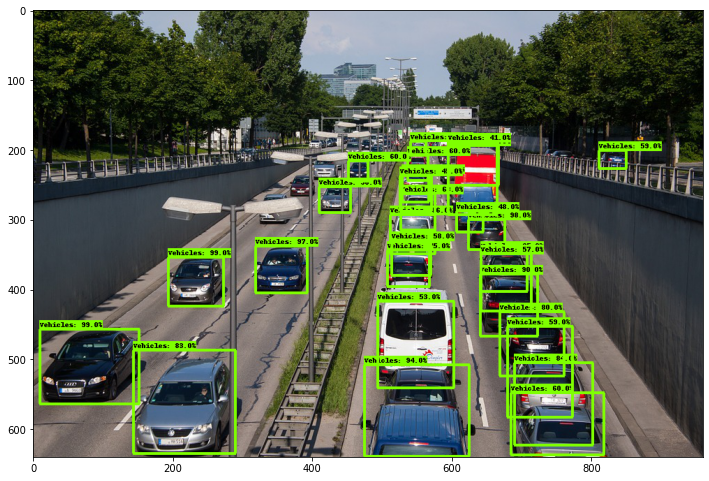

In [ ]:
image_path = os.path.join('traffic' + '.jpg')
#image_np = load_image_into_numpy_array(image_path)
img_data = tf.io.gfile.GFile(image_path, 'rb').read()
image = Image.open(BytesIO(img_data))
(im_width, im_height) = image.size
image_np = np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

input_tensor = np.expand_dims(image_np, 0)
start_time = time.time()
detections = detect_fn(input_tensor)
end_time = time.time()
print(end_time - start_time)

plt.rcParams['figure.figsize'] = [42, 21]
label_id_offset = 1
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.int32),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.40,
      agnostic_mode=False)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()

In [ ]:
!zip exported.zip -r ./exported-models

  adding: exported-models/ (stored 0%)
  adding: exported-models/pipeline.config (deflated 66%)
  adding: exported-models/checkpoint/ (stored 0%)
  adding: exported-models/checkpoint/checkpoint (deflated 42%)
  adding: exported-models/checkpoint/ckpt-0.data-00000-of-00001 (deflated 7%)
  adding: exported-models/checkpoint/ckpt-0.index (deflated 80%)
  adding: exported-models/saved_model/ (stored 0%)
  adding: exported-models/saved_model/saved_model.pb (deflated 93%)
  adding: exported-models/saved_model/assets/ (stored 0%)
  adding: exported-models/saved_model/variables/ (stored 0%)
  adding: exported-models/saved_model/variables/variables.index (deflated 80%)
  adding: exported-models/saved_model/variables/variables.data-00000-of-00001 (deflated 7%)


# Export TFLite

In [ ]:
# From the tensorflow/models/research/ directory
!cd models/research/ && python object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path /content/exported-models/pipeline.config \
    --trained_checkpoint_dir /content/exported-models/checkpoint \
    --output_directory /content/exported_tflitemodel \
    --ssd_max_detections 100

2020-09-15 06:36:22.717483: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:36:26.239666: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-15 06:36:26.245877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-15 06:36:26.246400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-09-15 06:36:26.246449: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:36:26.252230: I tensorflow/stream_executor/plat

In [ ]:
# From the tensorflow/models/research/ directory
!cd models/research/ && python object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path /content/pipeline_file.config \
    --trained_checkpoint_dir /content/myoutputmodel \
    --output_directory /content/exported_tflitemodel2 \
    --ssd_max_detections 100

2020-09-15 06:40:19.654013: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:40:21.792051: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-15 06:40:21.798349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-15 06:40:21.798857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-09-15 06:40:21.798898: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 06:40:21.800729: I tensorflow/stream_executor/plat

In [ ]:
saved_model_dir = './exported_tflitemodel/saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir,signature_keys=['serving_default'])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

with tf.io.gfile.GFile('./exported_tflitemodel/model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
saved_model_dir = './exported_tflitemodel2/saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir,signature_keys=['serving_default'])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

with tf.io.gfile.GFile('./exported_tflitemodel2/model.tflite', 'wb') as f:
  f.write(tflite_model)

# Video Data

In [ ]:
!pip install pytube3 #https://pypi.org/project/pytube3/

In [ ]:
#!pip3 install pytube --user
import pytube
video_url = 'https://www.youtube.com/watch?v=_i4qgq2rzRs'#'https://www.youtube.com/watch?v=gY8E8ILFkzo'
youtube = pytube.YouTube(video_url)
video = youtube.streams.first()

In [ ]:
!pwd
!mkdir videos

/content


In [ ]:
video.download('videos/')

'/content/videos/Driving in San Jose 4K - Silicon Valley - California USA.mp4'

In [ ]:
!mv ./videos/*.mp4 testvideo1.mp4

In [ ]:
import os
import pathlib
import cv2
import time
#!apt install python3-opencv
print(cv2.__version__)

4.4.0


In [ ]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.6/dist-packages (0.5.3)


In [ ]:
from imutils.video import FPS
import imutils

In [ ]:
!ffmpeg -i testvideo1.mp4 -t 00:00:06 -c:v copy video-clip.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
import time
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('./exported-models/saved_model/')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

In [ ]:
label_map_path='./UAVision.txt'
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
import cv2
video_path='./testvideo1.mp4'
cap = cv2.VideoCapture(video_path)
print(cap.get(cv2.CAP_PROP_FPS))
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_width)
print(frame_height)

30.0
640
360


In [ ]:
fps = FPS().start()

# Define the codec and create VideoWriter object.
#out = cv2.VideoWriter('./output_video2.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
out = cv2.VideoWriter('./output_video1.mp4',cv2.VideoWriter_fourcc('M','P','4','V'), 30, (frame_width,frame_height))

i=0

# frame 
currentframe = 0
while (cap.isOpened() and currentframe<2000):
  ret, image_np = cap.read()
  if len((np.array(image_np)).shape) == 0:
    break
  
  input_tensor = np.expand_dims(image_np, 0)
  start_time = time.time()
  detections = detect_fn(input_tensor)
  end_time = time.time()
  print(end_time - start_time)

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)

  #display(Image.fromarray(image_np))
  #cv2_imshow('object detection', cv2.resize(image_np, (800,600)))
  #cv2_imshow(cv2.resize(image_np, (640,360)))
  name = './Test_data/frame' + str(currentframe) + '.jpg'
  print ('Creating\...' + name) 
  cv2.imwrite(name, image_np_with_detections) 
  # increasing counter so that it will 
            # show how many frames are created 
  currentframe += 1
  fps.update()
  out.write(image_np_with_detections)

# stop the timer and display FPS information
fps.stop()
print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))
cap.release()
out.release()
#cv2.destroyAllWindows()

0.0599672794342041
Creating\..../Test_data/frame0.jpg
0.04968070983886719
Creating\..../Test_data/frame1.jpg
0.0490415096282959
Creating\..../Test_data/frame2.jpg
0.04706883430480957
Creating\..../Test_data/frame3.jpg
0.05391645431518555
Creating\..../Test_data/frame4.jpg
0.04742431640625
Creating\..../Test_data/frame5.jpg
0.046170711517333984
Creating\..../Test_data/frame6.jpg
0.04781341552734375
Creating\..../Test_data/frame7.jpg
0.04700446128845215
Creating\..../Test_data/frame8.jpg
0.04677987098693848
Creating\..../Test_data/frame9.jpg
0.04561662673950195
Creating\..../Test_data/frame10.jpg
0.046790361404418945
Creating\..../Test_data/frame11.jpg
0.04665207862854004
Creating\..../Test_data/frame12.jpg
0.04656052589416504
Creating\..../Test_data/frame13.jpg
0.04479169845581055
Creating\..../Test_data/frame14.jpg
0.04663658142089844
Creating\..../Test_data/frame15.jpg
0.045497894287109375
Creating\..../Test_data/frame16.jpg
0.04718732833862305
Creating\..../Test_data/frame17.jpg
0.04

error: ignored